In [21]:
import pandas as pd
import matplotlib.pyplot as plt

Converter para CSV

In [ ]:
caminho = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\data\meios_pagamentos.json"
df = pd.read_json(caminho)
print(df.head())




Extrair os dados do JSON

In [17]:
import ast  # para converter string -> dicionário

# A coluna onde estão os JSONs provavelmente é a segunda
df_json = df_raw.iloc[:, 1].apply(lambda x: ast.literal_eval(x))

# Transformar cada dicionário em um DataFrame
df = pd.json_normalize(df_json)

print(df.head())


   AnoMes  quantidadePix    valorPix
0  202507     6698196.91  3497412.52
1  202506     6464330.71  2869832.97
2  202505     6643181.01  2822151.77
3  202504     6278102.30  2676807.81
4  202503     6249384.72  2570468.46


Ajustar o formato da data

In [18]:
df["AnoMes"] = pd.to_datetime(df["AnoMes"], format="%Y%m")
df = df.sort_values("AnoMes")


Salvar CSV tratado

In [19]:
caminho_tratado = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\data\meios_pagamentos_tratado.csv"
df.to_csv(caminho_tratado, index=False, encoding="utf-8")
print(f"CSV tratado salvo em: {caminho_tratado}")


CSV tratado salvo em: C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\data\meios_pagamentos_tratado.csv


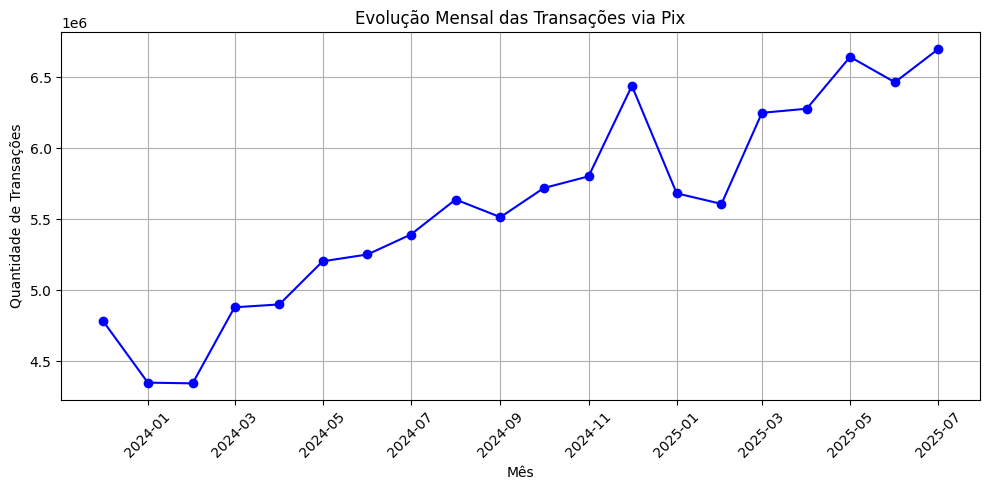

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["AnoMes"], df["quantidadePix"], marker="o", color="blue")
plt.title("Evolução Mensal das Transações via Pix")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Transações")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
